## Sample Analysis

In [1]:
library(dplyr, warn.conflicts = FALSE)

In [2]:
install.packages("psych")
library("psych")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [3]:
library(ggplot2)
library(reshape2)


Attaching package: ‘ggplot2’

The following objects are masked from ‘package:psych’:

    %+%, alpha



In [4]:
boston <- read.table('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data')

In [5]:
features <- c('CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV')
boston_stats <- data.frame(features)
stats <- describe(boston)
stats$vars <- NULL; stats$trimmed <- NULL; stats$mad <- NULL;
boston_stats <- cbind(boston_stats, stats)
boston_stats

,features,n,mean,sd,median,min,max,range,skew,kurtosis,se
V1,CRIM,506,3.61352356,8.6015451,0.25651,0.00632,88.9762,88.96988,5.1922223,36.59581589,0.382385321
V2,ZN,506,11.36363636,23.3224530,0.00000,0.00000,100.0000,100.00000,2.2124881,3.95238731,1.036809500
V3,INDUS,506,11.13677866,6.8603529,9.69000,0.46000,27.7400,27.28000,0.2932747,-1.24019490,0.304979888
V4,CHAS,506,0.06916996,0.2539940,0.00000,0.00000,1.0000,1.00000,3.3857377,9.48197035,0.011291412
V5,NOX,506,0.55469506,0.1158777,0.53800,0.38500,0.8710,0.48600,0.7249897,-0.08741064,0.005151391
V6,RM,506,6.28463439,0.7026171,6.20850,3.56100,8.7800,5.21900,0.4012223,1.84183241,0.031235142
V7,AGE,506,68.57490119,28.1488614,77.50000,2.90000,100.0000,97.10000,-0.5954162,-0.97802966,1.251369525
V8,DIS,506,3.79504269,2.1057101,3.20745,1.12960,12.1265,10.99690,1.0057898,0.45759158,0.093610233
V9,RAD,506,9.54940711,8.7072594,5.00000,1.00000,24.0000,23.00000,0.9988651,-0.87892910,0.387084894
V10,TAX,506,408.23715415,168.5371161,330.00000,187.00000,711.0000,524.00000,0.6659891,-1.15031761,7.492388692


#### Data subset (n = 5)

In [6]:
randomSample = function(df, n){
    return (df[sample(nrow(df), n),])
}

In [7]:
samp <- randomSample(boston,5)
colnames(samp) <- features
samp

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
375,18.49820,0,18.10,0,0.668,4.138,100.0,1.1370,24,666,20.2,396.90,37.97,13.8
311,2.63548,0,9.90,0,0.544,4.973,37.8,2.5194,4,304,18.4,350.45,12.64,16.1
306,0.05479,33,2.18,0,0.472,6.616,58.1,3.3700,7,222,18.4,393.36,8.93,28.4
147,2.15505,0,19.58,0,0.871,5.628,100.0,1.5166,5,403,14.7,169.27,16.65,15.6
137,0.32264,0,21.89,0,0.624,5.942,93.5,1.9669,4,437,21.2,378.25,16.90,17.4


### Data Description 

The 2nd sample might be representative of a new, up-and-coming,  wealthy, but sparsely populated neighborhood. It has low crime rates `CRIM` = 0.04 , as well as a low pupil-to-teacher ratio `PTRATIO` = 16.9. It has the smallest proportion of owner-occupied units built prior the  1940s `AGE`. 

The 3rd sample `221` might be representative of a *downtown* region in Boston.  It has a small `DIS` value, which is the distance to five Boston employment centers. It also has the highest `MEDV` value of all 5 sampled, meaning housing in that region is the most expensive. 

The 5th sample, `479` is perhaps the most distinctive of the 5 sampled. It might be representative of an *urban area*.
It has a high proportion of non-retail businesses (perhaps highly residential, heavily populated). It has significantly higher nitrous oxide `NOX` levels and full-value property-tax rate `TAX`. The pupil to teacher ratio is also on the higher end. It also has the highest `RAD` value meaning that it is easily accessible to radial highways. As typical for the an urban city region, it has a high `LSTAT` value, meaning that there is a larger percent of lower-status individuals in the population.

** Minor note, I definitely forgot to set a seed when I randomized these samples. So, these data descriptions might not reflect the displayed sample after running the code again.

In [8]:
samp_stats <- describe(samp)
samp_stats <- cbind(features, samp_stats)
samp_stats$vars <- NULL ; samp_stats$trimmed <- NULL ; samp_stats$mad <- NULL
samp_stats

,features,n,mean,sd,median,min,max,range,skew,kurtosis,se
CRIM,CRIM,5,4.733232,7.7759738,2.15505,0.05479,18.4982,18.44341,1.0181365,-0.9857503,3.47752118
ZN,ZN,5,6.600000,14.7580487,0.00000,0.00000,33.0000,33.00000,1.0733126,-0.9200000,6.60000000
INDUS,INDUS,5,14.330000,8.1574567,18.10000,2.18000,21.8900,19.71000,-0.4606169,-1.8073590,3.64812555
CHAS,CHAS,5,0.000000,0.0000000,0.00000,0.00000,0.0000,0.00000,NaN,NaN,0.00000000
NOX,NOX,5,0.635800,0.1514536,0.62400,0.47200,0.8710,0.39900,0.4533200,-1.5357404,0.06773212
RM,RM,5,5.459400,0.9462736,5.62800,4.13800,6.6160,2.47800,-0.1789079,-1.7654337,0.42318644
AGE,AGE,5,77.880000,28.3735264,93.50000,37.80000,100.0000,62.20000,-0.4085948,-1.9903168,12.68902676
DIS,DIS,5,2.101980,0.8766722,1.96690,1.13700,3.3700,2.23300,0.2997804,-1.7808929,0.39205975
RAD,RAD,5,8.800000,8.5848704,5.00000,4.00000,24.0000,20.00000,1.0209877,-0.9873603,3.83927076
TAX,TAX,5,406.400000,167.9502903,403.00000,222.00000,666.0000,444.00000,0.4297549,-1.5398739,75.10965317


#### Z-scores of sample data set

Z-score = $(X - \mu)/\sigma $

where $X$ = sample mean, and $\mu$ = population mean, and $\sigma$ = population standard dev

In [9]:
z_score <- function (X, mu, sd){
    z <- (X - mu)/sd
    return(z)
}

#### Bar Plot

Z-scores for the sample means.
Z-scores close to 0 indicate that the sample mean is close to the population mean. 

In [10]:
samp_z_score <- z_score(samp_stats$mean, boston_stats$mean, boston_stats$sd)
samp_z_df <- data.frame(features, samp_z_score)
samp_z_df

features,samp_z_score
CRIM,0.13017527
ZN,-0.20425109
INDUS,0.46546021
CHAS,-0.27232907
NOX,0.69991860
RM,-1.17451502
AGE,0.33056750
DIS,-0.80403407
RAD,-0.08606693
TAX,-0.01090059


In [11]:
samp_z_df1 <- subset(samp_z_df, samp_z_score >= 0)
samp_z_df2 <- subset(samp_z_df, samp_z_score <0)


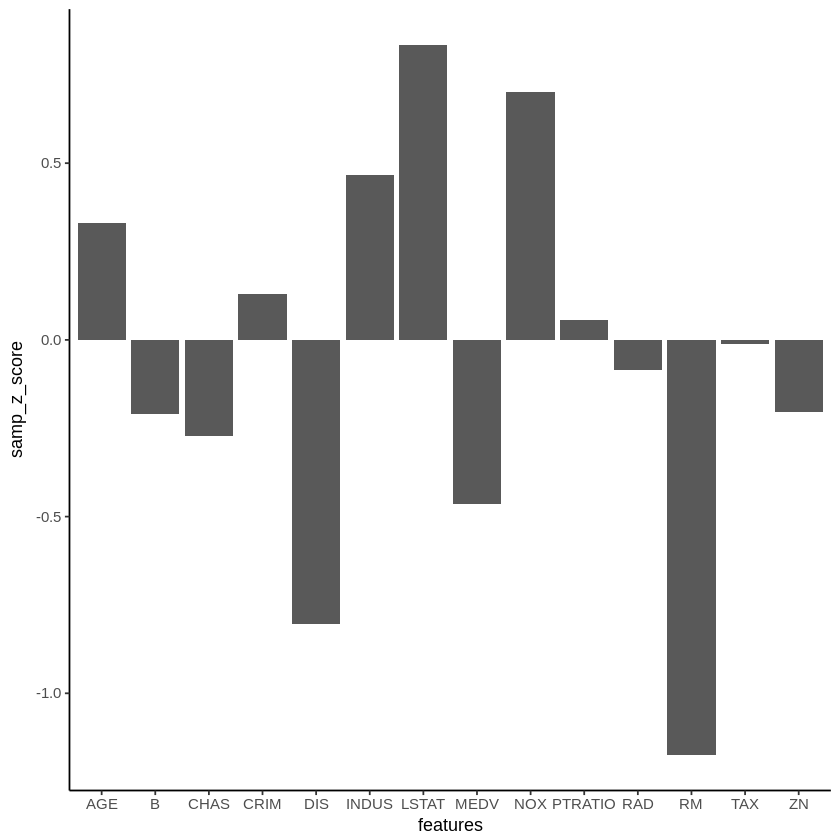

In [12]:
ggplot() +
    geom_bar(data=samp_z_df1, aes(x=features, y=samp_z_score), stat = "identity") +
    geom_bar(data=samp_z_df2, aes(x=features, y=samp_z_score), stat = "identity") +
    theme_classic()

#### Heat Map

For a heat map: X-axis feature, Y-axis instances, Z = color

In [13]:
t(samp)
samp_stats

,375,311,306,147,137
CRIM,18.4982,2.63548,0.05479,2.15505,0.32264
ZN,0.0000,0.00000,33.00000,0.00000,0.00000
INDUS,18.1000,9.90000,2.18000,19.58000,21.89000
CHAS,0.0000,0.00000,0.00000,0.00000,0.00000
NOX,0.6680,0.54400,0.47200,0.87100,0.62400
RM,4.1380,4.97300,6.61600,5.62800,5.94200
AGE,100.0000,37.80000,58.10000,100.00000,93.50000
DIS,1.1370,2.51940,3.37000,1.51660,1.96690
RAD,24.0000,4.00000,7.00000,5.00000,4.00000
TAX,666.0000,304.00000,222.00000,403.00000,437.00000


,features,n,mean,sd,median,min,max,range,skew,kurtosis,se
CRIM,CRIM,5,4.733232,7.7759738,2.15505,0.05479,18.4982,18.44341,1.0181365,-0.9857503,3.47752118
ZN,ZN,5,6.600000,14.7580487,0.00000,0.00000,33.0000,33.00000,1.0733126,-0.9200000,6.60000000
INDUS,INDUS,5,14.330000,8.1574567,18.10000,2.18000,21.8900,19.71000,-0.4606169,-1.8073590,3.64812555
CHAS,CHAS,5,0.000000,0.0000000,0.00000,0.00000,0.0000,0.00000,NaN,NaN,0.00000000
NOX,NOX,5,0.635800,0.1514536,0.62400,0.47200,0.8710,0.39900,0.4533200,-1.5357404,0.06773212
RM,RM,5,5.459400,0.9462736,5.62800,4.13800,6.6160,2.47800,-0.1789079,-1.7654337,0.42318644
AGE,AGE,5,77.880000,28.3735264,93.50000,37.80000,100.0000,62.20000,-0.4085948,-1.9903168,12.68902676
DIS,DIS,5,2.101980,0.8766722,1.96690,1.13700,3.3700,2.23300,0.2997804,-1.7808929,0.39205975
RAD,RAD,5,8.800000,8.5848704,5.00000,4.00000,24.0000,20.00000,1.0209877,-0.9873603,3.83927076
TAX,TAX,5,406.400000,167.9502903,403.00000,222.00000,666.0000,444.00000,0.4297549,-1.5398739,75.10965317


In [14]:
# create point-z scores
point_z_scores <- function(samp_df, stats_df){
    features <- (rownames(stats_df))
    point_z_df <- data.frame(features)
    col <- colnames(samp_df)
    z_scores_r1 <- (samp_df[[1]]-stats_df$mean) / stats_df$sd
    z_scores_r2 <- (samp_df[[2]]-stats_df$mean) / stats_df$sd
    z_scores_r3 <- (samp_df[[3]]-stats_df$mean) / stats_df$sd
    z_scores_r4 <- (samp_df[[4]]-stats_df$mean) / stats_df$sd
    z_scores_r5 <- (samp_df[[5]]-stats_df$mean) / stats_df$sd
    z_scores <- cbind(z_scores_r1, z_scores_r2, z_scores_r3, z_scores_r4, z_scores_r5)
    colnames(z_scores) <- col
    point_z_df <- cbind(point_z_df, z_scores)
    return(point_z_df)
}
a <- point_z_scores(t(samp), samp_stats)
a

features,375,311,306,147,137
CRIM,1.77019219,-0.6086996,1.71898317,-0.6086996,-0.5227939
ZN,0.80621770,-0.4472136,0.77923581,-0.4472136,-0.4019502
INDUS,0.51096808,-1.7566750,0.46215385,-1.7566750,-1.6747867
CHAS,Inf,NaN,Inf,NaN,Inf
NOX,117.93973373,-4.1979847,115.31054605,-4.1979847,0.2126063
RM,13.77910095,-5.7693671,13.35829244,-5.7693671,-5.0634402
AGE,-2.09285935,-2.7448122,-2.10689356,-2.7448122,-2.7212691
DIS,18.70279346,-2.3976806,18.24857582,-2.3976806,-1.6357082
RAD,1.12968508,-1.0250592,1.08330115,-1.0250592,-0.9472478
TAX,-2.30962268,-2.4197636,-2.31199362,-2.4197636,-2.4157862


In [15]:
# remove `CHAS`
a <- a[-4,]
a

,features,375,311,306,147,137
1,CRIM,1.77019219,-0.6086996,1.71898317,-0.6086996,-0.5227939
2,ZN,0.80621770,-0.4472136,0.77923581,-0.4472136,-0.4019502
3,INDUS,0.51096808,-1.7566750,0.46215385,-1.7566750,-1.6747867
5,NOX,117.93973373,-4.1979847,115.31054605,-4.1979847,0.2126063
6,RM,13.77910095,-5.7693671,13.35829244,-5.7693671,-5.0634402
7,AGE,-2.09285935,-2.7448122,-2.10689356,-2.7448122,-2.7212691
8,DIS,18.70279346,-2.3976806,18.24857582,-2.3976806,-1.6357082
9,RAD,1.12968508,-1.0250592,1.08330115,-1.0250592,-0.9472478
10,TAX,-2.30962268,-2.4197636,-2.31199362,-2.4197636,-2.4157862
11,PTRATIO,-0.03297958,-7.4909612,-0.19352322,-7.4909612,-7.2216414


Using features as id variables


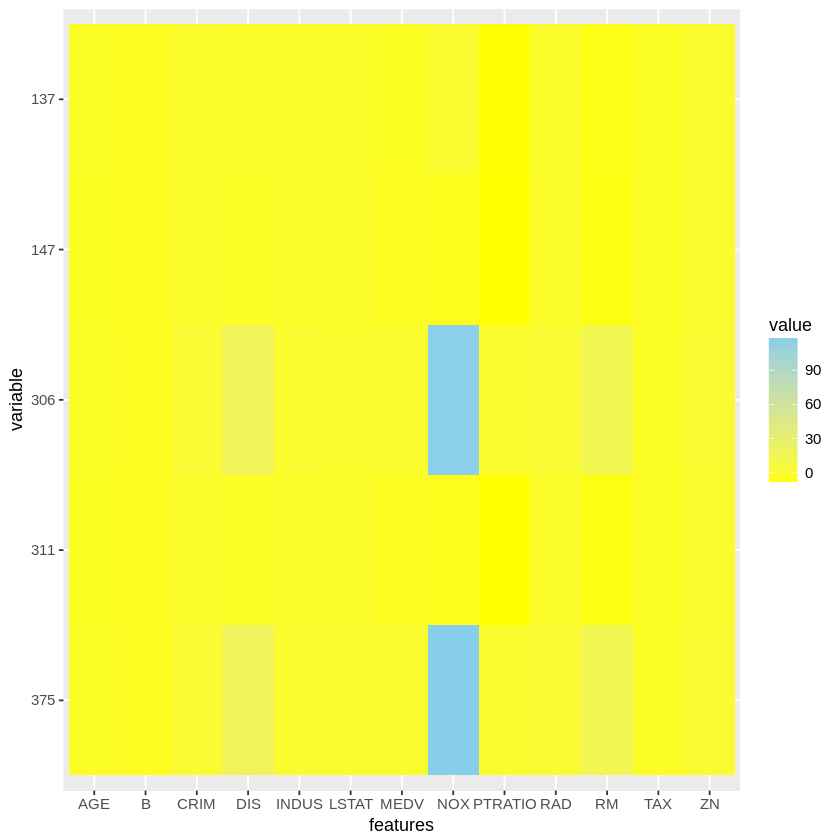

In [16]:
a <- melt(a)
ggplot(a, aes(x=features, y=variable)) + 
    geom_tile(aes(fill=value)) +
    scale_fill_gradient(low="yellow", high="skyblue")

The heatmap for the Z-scores is not particularly descriptive since some samples have outliers with very large Z-scores. 

### Comparing Values

Before scaling our data to Z-scores, we can not compare values across categories (different means and standard deviations). Ex: we cannot compare ages with proportions, since they are not in the same scale.

However, by taking the Z-score of the sample, we can compare each feature of the sample since they now have means around 0, and standard deviations of 1. This places each feature on the same scale. 